In [1]:
import json
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('pdf',fonttype = 42)
plt.rc('ps',fonttype = 42)
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('paper')

# rdir = '../results/lpc/results_22-05-13r1/'
# rdir = '../results/lpc/results_22-05-14/'
rdirs = [
#     '../results/lpc/results_22-05-14r1/',
#     '../results/lpc/results_22-05-16/'
#     '../results/lpc/results_22-07-29r1/'
    '../results/lpc/results_22-07-30/'
        ]
figdir='../overleaf/figs/'
def save(fig, name):
#     fig.tight_layout()
    for t in ['.pdf','.jpg']:
        plt.savefig(figdir+name+t, 
                    dpi=300,
                    bbox_inches='tight'
                   )

In [2]:
frames = []
# cols = [
#     'algorithm',
#     'random_state',
#     'time_time',
#        ]
globs = []
for rdir in rdirs:
    globs.extend(glob(rdir+'/*.json'))
for f in globs:
#     print(f)
    with open(f,'r') as file:
        try:
            d = json.load(file)
        except Exception as e:
            print('!!!Failed to load',f)
            print(e)
            continue
    frames.append(d)    
df_results = pd.DataFrame.from_records(frames)
print(len(frames),'records')
print(frames[0].keys())

df_results['ML'] = df_results['algorithm'].apply(lambda x: x.split('_pmc')[0].split('_mc')[0].upper())
df_results['postprocessing'] = df_results['algorithm'].apply(lambda x: 'MC-CV' if '_mc_cv' in x else x)
df_results['postprocessing'] = df_results['postprocessing'].apply(lambda x: 'MC' if '_mc' in x else x)
df_results['postprocessing'] = df_results['postprocessing'].apply(lambda x: 'PMC-CV' if '_pmc_cv' in x else x)
df_results['postprocessing'] = df_results['postprocessing'].apply(lambda x: 'PMC' if '_pmc' in x else x)
df_results['postprocessing'] = df_results['postprocessing'].apply(lambda x: 'Base Model' if not x in ['MC','PMC','MC-CV','PMC-CV'] else x)
df_results.loc[df_results['ML']=='lr_cv','ML'] = 'LR'

df_results['Wall Clock Time (s)'] = df_results['time_time']

df_results['groups'] = df_results['groups'].apply(lambda x: ','.join(x) if isinstance(x,list) else x)
# df_results = df_results.loc[df_results.n_bins==10]
df_results = df_results.loc[df_results.groups!='ethnicity,gender,anchor_year_group']
df_results = df_results.loc[df_results.gamma==0.05]
df_results = df_results.loc[df_results.rho==0.001]
df_results.groupby('algorithm')['random_state'].count()

23760 records
dict_keys(['dataset', 'algorithm', 'params', 'process_time', 'time_time', 'groups', 'random_state', 'alpha', 'n_bins', 'gamma', 'rho', 'n_updates', 'roc_auc_train', 'auprc_train', 'accuracy_train', 'MC_loss_train', 'PMC_loss_train', 'DC_loss_train', 'roc_auc_test', 'auprc_test', 'accuracy_test', 'MC_loss_test', 'PMC_loss_test', 'DC_loss_test'])


algorithm
lr        990
lr_mc     990
lr_pmc    990
rf        990
rf_mc     990
rf_pmc    990
Name: random_state, dtype: int64

In [3]:
df_results.groupby(['algorithm','alpha','gamma'])[['MC_loss_train','MC_loss_test']].mean()

MC_loss_train  MC_loss_test
algorithm alpha gamma                             
lr        0.001 0.05        0.254745      0.273013
          0.010 0.05        0.254745      0.261858
          0.050 0.05        0.105176      0.157981
          0.100 0.05        0.095552      0.127889
          0.150 0.05        0.094942      0.120523
lr_mc     0.001 0.05        0.000988      0.259124
          0.010 0.05        0.009845      0.200484
          0.050 0.05        0.048049      0.155131
          0.100 0.05        0.087708      0.128697
          0.150 0.05        0.094582      0.120523
lr_pmc    0.001 0.05        0.000925      0.267297
          0.010 0.05        0.008427      0.198735
          0.050 0.05        0.036905      0.158367
          0.100 0.05        0.061528      0.121608
          0.150 0.05        0.067236      0.113294
rf        0.001 0.05        0.176646      0.207307
          0.010 0.05        0.176646      0.207307
          0.050 0.05        0.176646      0.207307
          0.100 0.05        0.175421      0.203308
          0.150 0.05        0.170595      0.199087
rf_mc     0.001 0.05        0.000990      0.215872
          0.010 0.05        0.009877      0.184180
          0.050 0.05        0.049350      0.156674
          0.100 0.05        0.098131      0.165944
          0.150 0.05        0.138936      0.182665
rf_pmc    0.001 0.05        0.000893      0.215663
          0.010 0.05        0.008928      0.181008
          0.050 0.05        0.044448      0.156308
          0.100 0.05        0.086465      0.145154
          0.150 0.05        0.103274      0.149478

In [4]:
df_results['postprocessing'].unique()

array(['MC', 'PMC', 'Base Model'], dtype=object)

In [5]:
df_results['groups'].value_counts()

ethnicity,gender,insurance    2970
ethnicity,gender              2970
Name: groups, dtype: int64

In [6]:
df_results['rho'].unique()

array([0.001])

In [7]:

df_results.groupby('algorithm').mean().round(3)

,process_time,time_time,random_state,alpha,n_bins,gamma,rho,n_updates,roc_auc_train,auprc_train,...,MC_loss_train,PMC_loss_train,DC_loss_train,roc_auc_test,auprc_test,accuracy_test,MC_loss_test,PMC_loss_test,DC_loss_test,Wall Clock Time (s)
algorithm,,,,,,,,,,,,,,,,,,,,,
lr,24.449,24.496,7474.646,0.062,10.0,0.05,0.001,NaN,0.860,0.730,...,0.161,0.520,0.745,0.860,0.731,0.796,0.188,1.432,0.742,24.496
lr_mc,70.392,70.522,7474.646,0.062,10.0,0.05,0.001,154.709,0.860,0.732,...,0.048,0.299,0.614,0.860,0.731,0.796,0.173,13.826,0.731,70.522
lr_pmc,104.378,104.583,7474.646,0.062,10.0,0.05,0.001,269.887,0.861,0.732,...,0.035,0.060,0.508,0.861,0.732,0.796,0.172,13.080,0.624,104.583
rf,12.468,12.491,7474.646,0.062,10.0,0.05,0.001,NaN,0.871,0.768,...,0.175,3.214,0.652,0.869,0.765,0.812,0.205,3.246,0.787,12.491
rf_mc,63.612,63.739,7474.646,0.062,10.0,0.05,0.001,221.979,0.871,0.767,...,0.059,1.334,0.472,0.868,0.764,0.813,0.181,10.480,0.708,63.739
rf_pmc,101.602,101.798,7474.646,0.062,10.0,0.05,0.001,369.203,0.870,0.768,...,0.049,0.061,0.384,0.868,0.764,0.813,0.170,8.717,0.611,101.798


In [8]:
# nice names
nice_names = {
    'roc_auc_test':'AUROC',
    'auprc_test':'AUPRC',
    'MC_loss_test':'MC loss',
    'PMC_loss_test':'PMC loss',
    'DC_loss_test':'DC loss',
    'n_updates':'# of Updates'
}
nice_levels = {
    'algorithm':{
        'lr':'LR',
        'lr_mc':'LR+MC',
        'lr_mc_cv':'LR+MC-CV',
        'lr_pmc':'LR+PMC',
        'lr_pmc_cv':'LR+PMC-CV',
        'rf':'RF',
        'rf_mc':'RF+MC',
        'rf_mc_cv':'RF+MC-CV',
        'rf_pmc':'RF+PMC',
        'rf_pmc_cv':'RF+PMC_CV'
    }
}

In [9]:
import pdb
def nice_stat(x):
#     pdb.set_trace()
    return f'{x.mean():.2f}$\pm${x.sem():.2f}'
def nice_stats(x):
    return x.apply(lambda x: nice_stat(x))


In [10]:
metrics = ['roc_auc','auprc', 'MC_loss', 'PMC_loss', 'DC_loss' ]
test_metrics = [m+'_test' for m in metrics]
train_metrics = [m+'_train' for m in metrics]
# df_results.groupby('algorithm')[].mean().round(3)
df_results.groupby(['ML','postprocessing'])[test_metrics].mean().round(3)

# for m in test_metrics:
#     df_results[m+'_nice'] = 
df_results.groupby(['ML','postprocessing'])[test_metrics].apply(nice_stats)

roc_auc_test     auprc_test   MC_loss_test  \
ML postprocessing                                                
LR Base Model      0.86$\pm$0.00  0.73$\pm$0.00  0.19$\pm$0.00   
   MC              0.86$\pm$0.00  0.73$\pm$0.00  0.17$\pm$0.00   
   PMC             0.86$\pm$0.00  0.73$\pm$0.00  0.17$\pm$0.00   
RF Base Model      0.87$\pm$0.00  0.76$\pm$0.00  0.20$\pm$0.00   
   MC              0.87$\pm$0.00  0.76$\pm$0.00  0.18$\pm$0.00   
   PMC             0.87$\pm$0.00  0.76$\pm$0.00  0.17$\pm$0.00   

                    PMC_loss_test   DC_loss_test  
ML postprocessing                                 
LR Base Model       1.43$\pm$0.82  0.74$\pm$0.01  
   MC              13.83$\pm$3.24  0.73$\pm$0.03  
   PMC             13.08$\pm$3.25  0.62$\pm$0.03  
RF Base Model       3.25$\pm$0.01  0.79$\pm$0.01  
   MC              10.48$\pm$2.18  0.71$\pm$0.03  
   PMC              8.72$\pm$2.07  0.61$\pm$0.02

In [11]:
df_tbl = df_results.copy()
test_metrics = ['AUROC','MC loss','PMC loss','DC loss']
df_tbl = df_tbl.rename(columns=nice_names) 
for level,nicety in nice_levels.items():
    df_tbl[level] = df_tbl[level].apply(lambda x: nicety[x] if x in nicety else x)
df_tbl.groupby(['alpha','gamma','rho','algorithm'])[test_metrics].apply(nice_stats)
df_tbl.groupby(['algorithm'])[test_metrics].apply(nice_stats)

,AUROC,MC loss,PMC loss,DC loss
algorithm,,,,
LR,0.86$\pm$0.00,0.19$\pm$0.00,1.43$\pm$0.82,0.74$\pm$0.01
LR+MC,0.86$\pm$0.00,0.17$\pm$0.00,13.83$\pm$3.24,0.73$\pm$0.03
LR+PMC,0.86$\pm$0.00,0.17$\pm$0.00,13.08$\pm$3.25,0.62$\pm$0.03
RF,0.87$\pm$0.00,0.20$\pm$0.00,3.25$\pm$0.01,0.79$\pm$0.01
RF+MC,0.87$\pm$0.00,0.18$\pm$0.00,10.48$\pm$2.18,0.71$\pm$0.03
RF+PMC,0.87$\pm$0.00,0.17$\pm$0.00,8.72$\pm$2.07,0.61$\pm$0.02


In [12]:
df_tbl = df_results.copy()
# df_tbl = df_tbl.loc[df_tbl.n_bins==10]
# df_tbl = df_tbl.loc[df_tbl.alpha>0.01]
# df_tbl = df_tbl.loc[df_tbl.rho>0.01]
# df_tbl = df_tbl.loc[df_tbl.gamma>0.01]
test_metrics = ['AUROC','MC loss','PMC loss','DC loss','Wall Clock Time (s)']
df_tbl = df_tbl.rename(columns=nice_names) 
for level,nicety in nice_levels.items():
    df_tbl[level] = df_tbl[level].apply(lambda x: nicety[x] if x in nicety else x)
tbl = df_tbl.groupby(['alpha','gamma','algorithm'])[test_metrics].apply(nice_stats)
# df_tbl.groupby(['algorithm'])[test_metrics].apply(nice_stats)
tbl

AUROC        MC loss         PMC loss  \
alpha gamma algorithm                                                  
0.001 0.05  LR         0.86$\pm$0.00  0.27$\pm$0.01    4.79$\pm$4.11   
            LR+MC      0.86$\pm$0.00  0.26$\pm$0.01  67.15$\pm$15.67   
            LR+PMC     0.86$\pm$0.00  0.27$\pm$0.01  62.22$\pm$15.71   
            RF         0.87$\pm$0.00  0.21$\pm$0.00    3.25$\pm$0.03   
            RF+MC      0.87$\pm$0.00  0.22$\pm$0.01  38.67$\pm$10.10   
            RF+PMC     0.87$\pm$0.00  0.22$\pm$0.01   33.03$\pm$9.50   
0.010 0.05  LR         0.86$\pm$0.00  0.26$\pm$0.01    0.68$\pm$0.02   
            LR+MC      0.86$\pm$0.00  0.20$\pm$0.01    0.43$\pm$0.03   
            LR+PMC     0.86$\pm$0.00  0.20$\pm$0.01    2.18$\pm$1.77   
            RF         0.87$\pm$0.00  0.21$\pm$0.00    3.25$\pm$0.03   
            RF+MC      0.87$\pm$0.00  0.18$\pm$0.01    7.07$\pm$3.54   
            RF+PMC     0.87$\pm$0.00  0.18$\pm$0.01    8.09$\pm$3.48   
0.050 0.05  LR         0.86$\pm$0.00  0.16$\pm$0.00    0.56$\pm$0.02   
            LR+MC      0.86$\pm$0.00  0.16$\pm$0.00    0.44$\pm$0.01   
            LR+PMC     0.86$\pm$0.00  0.16$\pm$0.00    0.33$\pm$0.01   
            RF         0.87$\pm$0.00  0.21$\pm$0.00    3.25$\pm$0.03   
            RF+MC      0.87$\pm$0.00  0.16$\pm$0.00    1.00$\pm$0.02   
            RF+PMC     0.87$\pm$0.00  0.16$\pm$0.00    1.63$\pm$1.18   
0.100 0.05  LR         0.86$\pm$0.00  0.13$\pm$0.00    0.56$\pm$0.02   
            LR+MC      0.86$\pm$0.00  0.13$\pm$0.00    0.56$\pm$0.02   
            LR+PMC     0.86$\pm$0.00  0.12$\pm$0.00    0.32$\pm$0.01   
            RF         0.87$\pm$0.00  0.20$\pm$0.00    3.25$\pm$0.03   
            RF+MC      0.87$\pm$0.00  0.17$\pm$0.00    2.41$\pm$0.02   
            RF+PMC     0.87$\pm$0.00  0.15$\pm$0.00    0.39$\pm$0.01   
0.150 0.05  LR         0.86$\pm$0.00  0.12$\pm$0.00    0.56$\pm$0.02   
            LR+MC      0.86$\pm$0.00  0.12$\pm$0.00    0.56$\pm$0.02   
            LR+PMC     0.86$\pm$0.00  0.11$\pm$0.00    0.34$\pm$0.01   
            RF         0.87$\pm$0.00  0.20$\pm$0.00    3.25$\pm$0.03   
            RF+MC      0.87$\pm$0.00  0.18$\pm$0.00    3.25$\pm$0.03   
            RF+PMC     0.87$\pm$0.00  0.15$\pm$0.00    0.44$\pm$0.02   

                             DC loss Wall Clock Time (s)  
alpha gamma algorithm                                     
0.001 0.05  LR         0.78$\pm$0.03      24.58$\pm$0.15  
            LR+MC      1.08$\pm$0.13     160.32$\pm$4.11  
            LR+PMC     1.01$\pm$0.12     200.00$\pm$4.07  
            RF         0.80$\pm$0.01      12.53$\pm$0.04  
            RF+MC      0.98$\pm$0.11     136.68$\pm$1.39  
            RF+PMC     0.91$\pm$0.10     160.60$\pm$1.34  
0.010 0.05  LR         0.75$\pm$0.01      24.58$\pm$0.15  
            LR+MC      0.52$\pm$0.01      80.22$\pm$0.94  
            LR+PMC     0.53$\pm$0.03     117.75$\pm$1.22  
            RF         0.80$\pm$0.01      12.48$\pm$0.03  
            RF+MC      0.62$\pm$0.05      81.23$\pm$0.88  
            RF+PMC     0.65$\pm$0.06     112.86$\pm$0.84  
0.050 0.05  LR         0.73$\pm$0.01      24.37$\pm$0.19  
            LR+MC      0.59$\pm$0.01      46.06$\pm$0.34  
            LR+PMC     0.49$\pm$0.01      80.44$\pm$0.78  
            RF         0.80$\pm$0.01      12.50$\pm$0.03  
            RF+MC      0.53$\pm$0.01      44.44$\pm$0.32  
            RF+PMC     0.53$\pm$0.03      86.62$\pm$0.42  
0.100 0.05  LR         0.73$\pm$0.01      24.28$\pm$0.17  
            LR+MC      0.73$\pm$0.01      33.73$\pm$0.23  
            LR+PMC     0.53$\pm$0.01      66.37$\pm$0.65  
            RF         0.78$\pm$0.01      12.49$\pm$0.03  
            RF+MC      0.69$\pm$0.01      31.67$\pm$0.25  
            RF+PMC     0.47$\pm$0.01      77.11$\pm$0.35  
0.150 0.05  LR         0.73$\pm$0.01      24.67$\pm$0.16  
            LR+MC      0.73$\pm$0.01      32.29$\pm$0.18  
            LR+PMC     0.55$\pm$0.01      58.37$\pm$0.57  
            RF 

# comparison of winning percentages

In [80]:
import ipdb
best_config = []
test_metrics = ['AUROC','MC loss','PMC loss','DC loss']
df = df_results.rename(columns=nice_names) 
# for alg, dfg in df_results.groupby('algorithm'):
for metric in test_metrics:
    for seed, dfgs in df.groupby('random_state'):
        if metric=='AUROC':
            best = dfgs.loc[dfgs[metric].idxmax()]
        else:
            best = dfgs.loc[dfgs[metric].idxmin()]
        tmpbest = best[['algorithm','alpha','gamma','rho','n_bins','ML','Wall Clock Time (s)',
                                 'postprocessing','groups']]
        tmpbest['metric'] = metric
        tmpbest['value'] = best[metric]
#         ipdb.set_trace()
        best_config.append(tmpbest.to_dict())
        
best_df = pd.DataFrame.from_records(best_config)

In [81]:
# for m, dfm in best_df.groupby('metric'):
#     print(m)
#     display(dfm[['postprocessing']].value_counts())
#     display(dfm[['ML','postprocessing','alpha']].value_counts())

# tbl = best_df.groupby(['metric','ML'])['postprocessing'].value_counts().unstack().fillna(0).astype(int)
tbl = best_df.groupby(['metric'])['postprocessing'].value_counts().unstack().fillna(0).astype(int)
tbl.to_latex('../overleaf/tbls/winning_configs.tex')
tbl

postprocessing,Base Model,MC,PMC
metric,,,
AUROC,5,88,6
DC loss,0,36,63
MC loss,8,21,70
PMC loss,0,27,72


In [86]:
best_df.groupby(['metric','postprocessing'])['value'].mean().unstack()

postprocessing,Base Model,MC,PMC
metric,,,
AUROC,0.868903,0.869647,0.869384
DC loss,NaN,0.308685,0.316318
MC loss,0.099463,0.079224,0.079186
PMC loss,NaN,0.182222,0.180432


In [15]:
best_df

,algorithm,alpha,gamma,rho,n_bins,ML,Wall Clock Time (s),postprocessing,groups,metric,value
0,rf_mc,0.10,0.05,0.001,10,RF,29.762132,MC,"ethnicity,gender,insurance",AUROC,0.869895
1,rf_mc,0.05,0.05,0.001,10,RF,41.293877,MC,"ethnicity,gender",AUROC,0.868786
2,rf_mc,0.10,0.05,0.001,10,RF,32.255032,MC,"ethnicity,gender,insurance",AUROC,0.872232
3,rf_mc,0.05,0.05,0.001,10,RF,44.590210,MC,"ethnicity,gender",AUROC,0.872413
4,rf_mc,0.01,0.05,0.001,10,RF,87.573176,MC,"ethnicity,gender",AUROC,0.869761
...,...,...,...,...,...,...,...,...,...,...,...
391,lr_pmc,0.01,0.05,0.001,10,LR,136.982494,PMC,"ethnicity,gender",DC loss,0.297807
392,lr_pmc,0.05,0.05,0.001,10,LR,62.167771,PMC,"ethnicity,gender,insurance",DC loss,0.395441
393,rf_pmc,0.10,0.05,0.001,10,RF,81.280232,PMC,"ethnicity,gender,insurance",DC loss,0.235365
394,rf_pmc,0.10,0.05,0.001,10,RF,74.354172,PMC,"ethnicity,gender",DC loss,0.369928


In [16]:
from sklearn.utils import resample
def boot_med(x):
    x2 = np.empty(1000)
    for i in range(1000):
        x2[i] = np.median(resample(x))
    
    return np.mean(x2)

AUROC
----------------------------------------
MC loss
----------------------------------------
PMC loss
----------------------------------------
DC loss
----------------------------------------
Wall Clock Time (s)
----------------------------------------
(4.5, -0.5)
(4.4, -0.5)
(4.300000000000001, -0.5)
(4.200000000000001, -0.5)
Wall Clock Time (s)
----------------------------------------
(4.5, -0.5)
(4.4, -0.5)
(4.300000000000001, -0.5)
(4.200000000000001, -0.5)
Wall Clock Time (s)
----------------------------------------
(4.5, -0.5)
(4.4, -0.5)
(4.300000000000001, -0.5)
(4.200000000000001, -0.5)
# of Updates
----------------------------------------
(4.5, -0.5)
(4.4, -0.5)
(4.300000000000001, -0.5)
(4.200000000000001, -0.5)
# of Updates
----------------------------------------
(4.5, -0.5)
(4.4, -0.5)
(4.300000000000001, -0.5)
(4.200000000000001, -0.5)
# of Updates
----------------------------------------
(4.5, -0.5)
(4.4, -0.5)
(4.300000000000001, -0.5)
(4.200000000000001, -0.5)


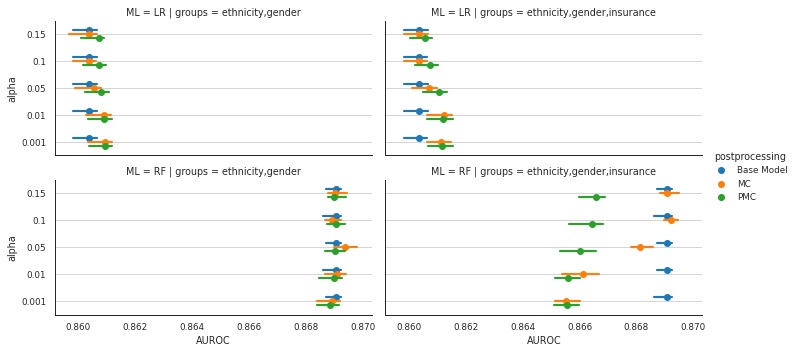

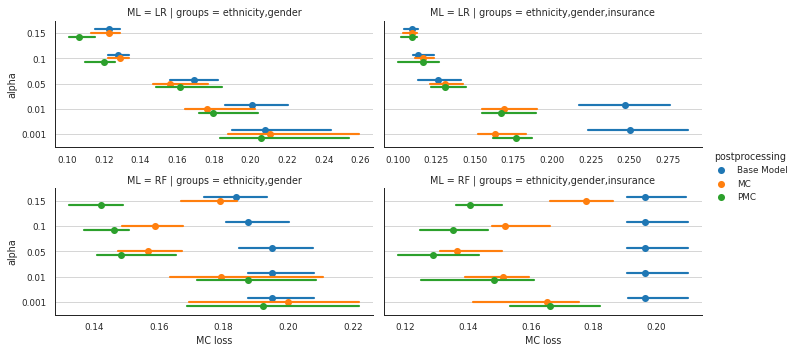

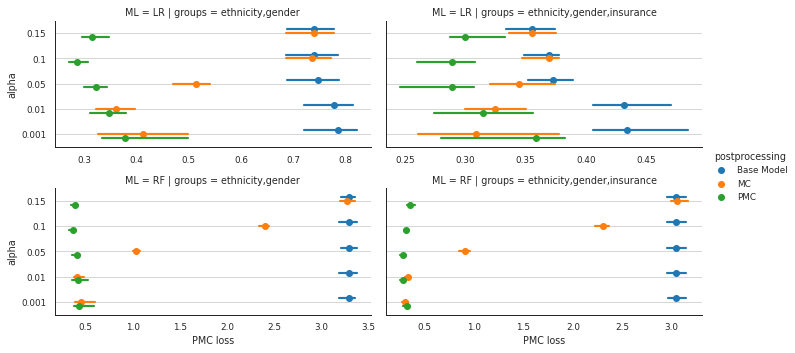

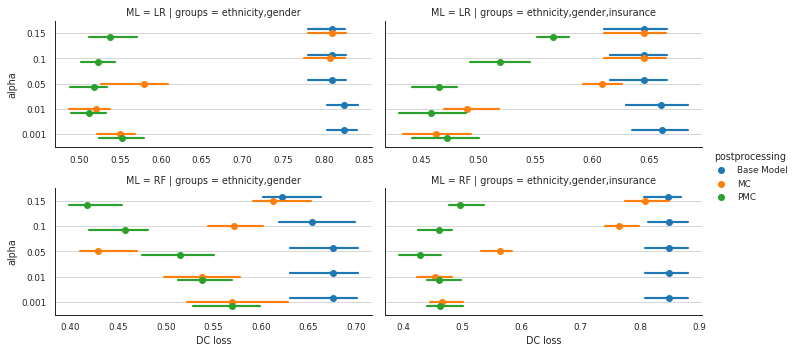

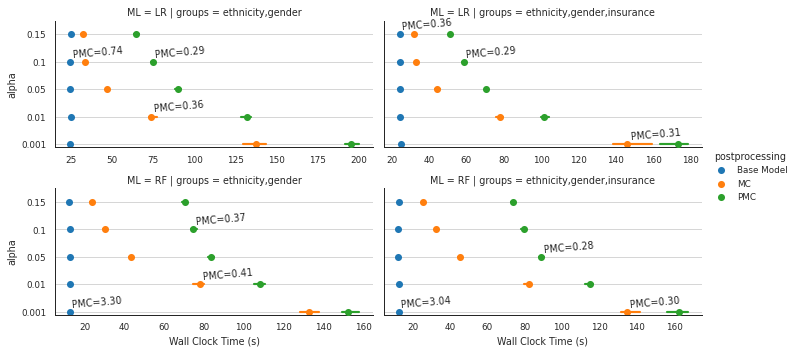

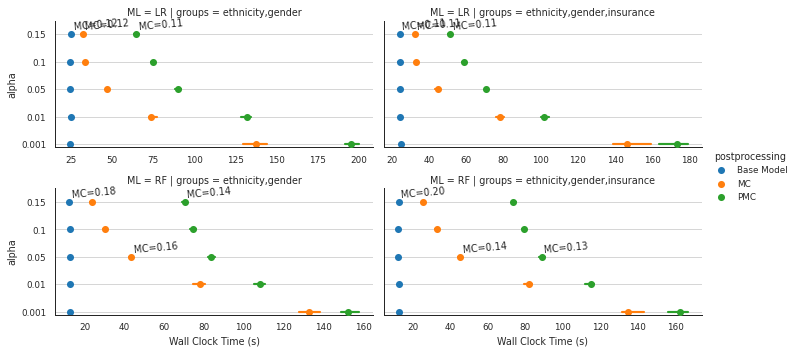

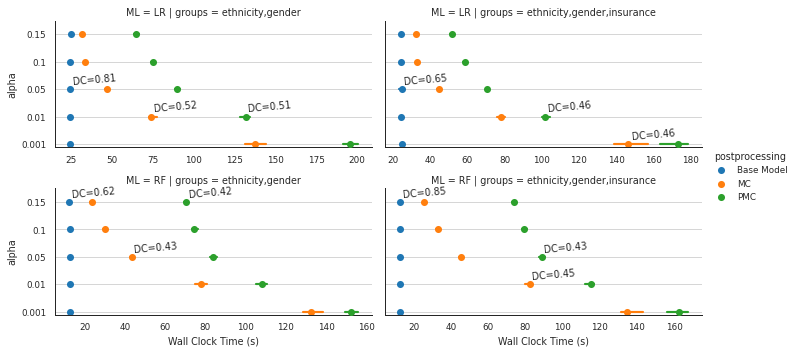

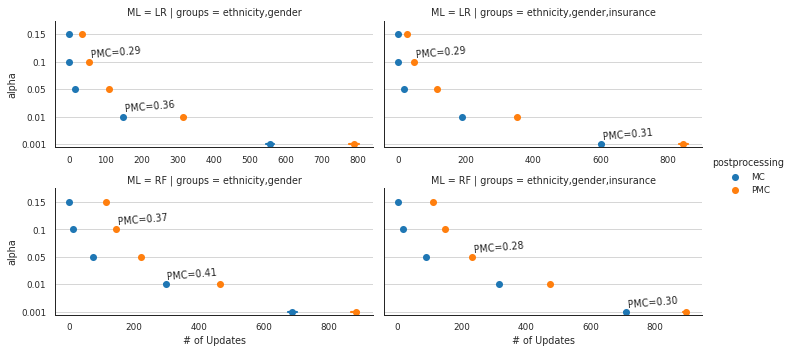

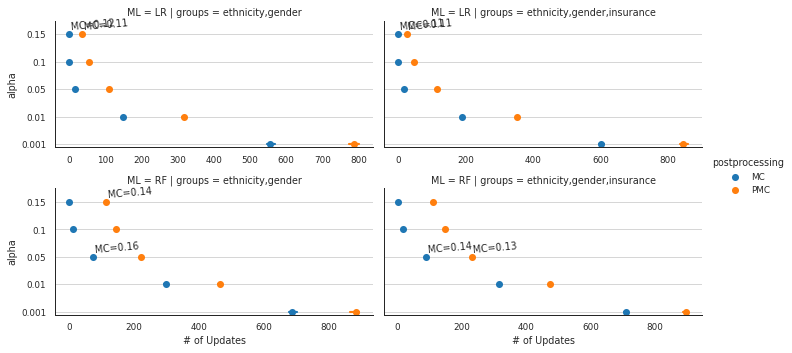

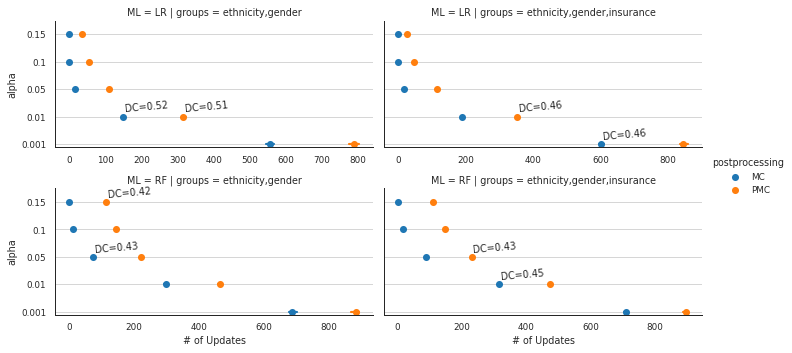

In [21]:
sns.set_style('white')
df_plt = df_results.copy()
df_plt = df_plt.loc[df_results.rho==0.001]
# df_plt = df_plt.loc[df_results.gamma==0.05]
df_plt = df_plt.loc[df_results.n_bins==10]
alpha_order=['0.15','0.1','0.05','0.01','0.001']
post_order=['Base Model','MC','PMC']
ml_order=['LR','RF']
group_order=['ethnicity,gender','ethnicity,gender,insurance']
# df_plt = df_plt.loc[df_results.alpha.isin([0.001,0.01,0.1])]
# df_plt = df_plt.copy().loc[df_results.gamma==0.1]
df_plt['alpha'] = df_plt['alpha'].astype(str)
df_plt = df_plt.rename(columns=nice_names) 
for level,nicety in nice_levels.items():
    df_plt[level] = df_plt[level].apply(lambda x: nicety[x] if x in nicety else x)
# row,col,hue=('rho','alpha','gamma') 
# row,col,hue=('ML','gamma','alpha') 
row,col,hue=('ML','groups','postprocessing') 

best_cfgs = []
for m in [nice_names[t] if t in nice_names else t for t in test_metrics+['Wall Clock Time (s)','# of Updates']]:
    losses = ['PMC loss', 'MC loss', 'DC loss'] if m in ['# of Updates','Wall Clock Time (s)'] else ['none']
    for loss in losses:
        print(m)
        if m == '# of Updates':
            hue_order=post_order[1:]
        else:
            hue_order=post_order
        print('----------------------------------------')
        g=sns.catplot(
            kind='point',
            dodge=.3 if m not in ['# of Updates','Wall Clock Time (s)'] else False,
            join=False,
            estimator=np.median,
            data=df_plt,
            x=m,
            y='alpha',
            order=alpha_order,
            hue=hue,
            marker=hue,
            hue_order=hue_order,
            row=row,
            row_order=ml_order,
            col=col,
            col_order=group_order,
            sharex=True if m=='AUROC' else False,
            aspect=2,
            height=2.5
        )
#         loss = 'PMC loss'
        for (ml,group),ax in g.axes_dict.items():
            ax.yaxis.grid(True)
            if m == '# of Updates' or m == 'Wall Clock Time (s)':
                xoff=3 if m == '# of Updates' else 1
                yoff=-.1
                df = df_plt.copy().loc[(df_plt.ML==ml) & (df_plt.groups==group) & (df_plt.postprocessing.isin(hue_order))]
                scores = df.groupby(['alpha','postprocessing'])[loss].median().reset_index()
                best_idx = scores.groupby('postprocessing')[loss].idxmin()
    #             for p in hue_order: 
                for p, val in best_idx.iteritems():
                    s = scores.loc[val]
                    a = s['alpha'] 
                    score = s[loss]
                    y = alpha_order.index(a)
                    x = boot_med(df.loc[(df.postprocessing==p) & (df.alpha==a)][m].values )
                    lossname=loss.split(' ')[0]
                    if p in ['MC','PMC']:
                        best_cfgs.append({
                            'metric': loss,
                            'Best Loss': score,
                             m:x,
                            'alpha':a,
                            'postprocessing':p,
                            'ml':ml,
                            'groups':group,
                        })
                    ax.annotate(f'{lossname}={score:.2f}', xy=(x+xoff,y+yoff), horizontalalignment='left',va='bottom',
                               rotation=5)
                ylim=ax.get_ylim()
                print(ylim)
                ax.set_ylim(bottom=ylim[0]-.1)

        plt.savefig((f"../overleaf/figs/catpoint_{m}_vs_alpha_row-{row}_col-{col}_hue-{hue}_annot-{loss}.pdf"
                    .replace(' ','-')
                    .replace('#','n')
                    ),
                    dpi=300, bbox_inches='tight' 
                   )

In [22]:
df_cfgs = pd.DataFrame.from_records(best_cfgs)
display(df_cfgs)

,metric,Best Loss,Wall Clock Time (s),alpha,postprocessing,ml,groups,# of Updates
0,PMC loss,0.359786,74.377098,0.01,MC,LR,"ethnicity,gender",NaN
1,PMC loss,0.286113,74.765967,0.1,PMC,LR,"ethnicity,gender",NaN
2,PMC loss,0.308750,146.827111,0.001,MC,LR,"ethnicity,gender,insurance",NaN
3,PMC loss,0.288690,58.650027,0.1,PMC,LR,"ethnicity,gender,insurance",NaN
4,PMC loss,0.407704,78.077391,0.01,MC,RF,"ethnicity,gender",NaN
5,PMC loss,0.370140,74.586254,0.1,PMC,RF,"ethnicity,gender",NaN
6,PMC loss,0.303727,135.021268,0.001,MC,RF,"ethnicity,gender,insurance",NaN
7,PMC loss,0.280191,88.874109,0.05,PMC,RF,"ethnicity,gender,insurance",NaN
8,MC loss,0.122797,31.930631,0.15,MC,LR,"ethnicity,gender",NaN
9,MC loss,0.106297,64.772521,0.15,PMC,LR,"ethnicity,gender",NaN


In [23]:
df_cfgs

,metric,Best Loss,Wall Clock Time (s),alpha,postprocessing,ml,groups,# of Updates
0,PMC loss,0.359786,74.377098,0.01,MC,LR,"ethnicity,gender",NaN
1,PMC loss,0.286113,74.765967,0.1,PMC,LR,"ethnicity,gender",NaN
2,PMC loss,0.308750,146.827111,0.001,MC,LR,"ethnicity,gender,insurance",NaN
3,PMC loss,0.288690,58.650027,0.1,PMC,LR,"ethnicity,gender,insurance",NaN
4,PMC loss,0.407704,78.077391,0.01,MC,RF,"ethnicity,gender",NaN
5,PMC loss,0.370140,74.586254,0.1,PMC,RF,"ethnicity,gender",NaN
6,PMC loss,0.303727,135.021268,0.001,MC,RF,"ethnicity,gender,insurance",NaN
7,PMC loss,0.280191,88.874109,0.05,PMC,RF,"ethnicity,gender,insurance",NaN
8,MC loss,0.122797,31.930631,0.15,MC,LR,"ethnicity,gender",NaN
9,MC loss,0.106297,64.772521,0.15,PMC,LR,"ethnicity,gender",NaN


In [67]:
df_cfgs

,metric,Best Loss,Wall Clock Time (s),alpha,postprocessing,ml,groups,# of Updates
0,PMC loss,0.359786,74.377098,0.01,MC,LR,"ethnicity,gender",NaN
1,PMC loss,0.286113,74.765967,0.1,PMC,LR,"ethnicity,gender",NaN
2,PMC loss,0.308750,146.827111,0.001,MC,LR,"ethnicity,gender,insurance",NaN
3,PMC loss,0.288690,58.650027,0.1,PMC,LR,"ethnicity,gender,insurance",NaN
4,PMC loss,0.407704,78.077391,0.01,MC,RF,"ethnicity,gender",NaN
5,PMC loss,0.370140,74.586254,0.1,PMC,RF,"ethnicity,gender",NaN
6,PMC loss,0.303727,135.021268,0.001,MC,RF,"ethnicity,gender,insurance",NaN
7,PMC loss,0.280191,88.874109,0.05,PMC,RF,"ethnicity,gender,insurance",NaN
8,MC loss,0.122797,31.930631,0.15,MC,LR,"ethnicity,gender",NaN
9,MC loss,0.106297,64.772521,0.15,PMC,LR,"ethnicity,gender",NaN


In [68]:
import itertools as it
order = []
for m,ml,p in it.product(['MC loss','PMC loss','DC loss'],
                  ml_order,
                  post_order[1:]
                 ):
    order.append((m,ml,p))

tbl = (df_cfgs
       .rename(columns={'metric':'Metric','ml':'ML','postprocessing':'Postprocessing'})
       .groupby(['Metric','ML','Postprocessing']) 
       [['Best Loss','# of Updates','Wall Clock Time (s)']]
#        [['# of Updates','Wall Clock Time (s)']]
       .median()
#        .round(2) 
#        .astype(int)
       .sort_index(level='Metric',ascending=False)
       .loc[order]
)
tbl.to_latex('../overleaf/tbls/best_cfg_time.tex',
             multirow=True,
             formatters=[lambda x: f'{x:0.3f}',
                         lambda x: f'{x:.0f}',
                         lambda x: f'{x:.1f}'
                        ] 
            )
display(tbl)

Best Loss  # of Updates  Wall Clock Time (s)
Metric   ML Postprocessing                                              
MC loss  LR MC               0.116166        0.0000            32.150699
            PMC              0.107916       30.0615            58.108320
         RF MC               0.146666       82.1070            44.331435
            PMC              0.135471      172.4055            79.620906
PMC loss LR MC               0.334268      375.7690           110.602105
            PMC              0.287402       52.1665            66.707997
         RF MC               0.355715      503.5800           106.549329
            PMC              0.325165      187.5860            81.730181
DC loss  LR MC               0.491415      375.8695           110.756478
            PMC              0.484830      334.1115           116.989382
         RF MC               0.441140      195.2525            62.744009
            PMC              0.422285      172.3905            79.605653

In [69]:
((378-52)/52
 + (504.69-188.07)/188.07
)/2

3.976376431034271

In [70]:
from statannotations.Annotator import Annotator
import ipdb
# sns.set_style('whitegrid')

def make_plot(df_results, kind='box', plot_kwargs={}, facet_kwargs={}):
    df_plt = df_results.copy()
    df_plt = df_plt.rename(columns=nice_names) 
    for level,nicety in nice_levels.items():
        df_plt[level] = df_plt[level].apply(lambda x: nicety[x] if x in nicety else x)

    order=list(df_plt.groupby('algorithm').groups.keys())

    common_plot_kwargs = dict(
          order=order,
          orient="h",
#           palette="Spectral",
    )
    common_plot_kwargs.update(plot_kwargs)
    
    plot_args = dict(
       box=dict( 
            func=sns.boxplot, 
            showfliers=False,
            notch=True,
            dodge=False,
       ),
       point=dict(
          func=sns.pointplot, 
#           size=10,
#           jitter=False,
          join=False,
       ),
       violin=dict(  
          func=sns.violinplot, 
          dodge=False,
       )
    )
    
    x_vars=[
        'AUROC',
        'MC loss',
        'PMC loss',
        'DC loss'
    ]
    pairgrid_kwargs = dict(
        data=df_plt, 
        x_vars=x_vars,
        y_vars=['algorithm'],
        hue='postprocessing',
        aspect=0.8
    )
    pairgrid_kwargs.update(facet_kwargs)
    g = sns.PairGrid( **pairgrid_kwargs )

    # Draw a dot plot 
    g.map(**plot_args[kind],**common_plot_kwargs)
    # stat annotation pairs
    pairs=[
           ("LR", "LR+MC"), ("LR", "LR+PMC"), ("LR+MC", "LR+PMC"),
           ("RF", "RF+MC"), ("RF", "RF+PMC"), ("RF+MC", "RF+PMC")
          ]

    for (ax,x) in zip(g.axes.flat, x_vars):
        ax.yaxis.grid(True)
        ax.xaxis.grid(False)
        ax.set_ylabel('')
        xticks = ax.get_xticks()
        xticklabs = ax.get_xticklabels()
#             ax.set_xtick
        print(x)
        print('.......')
        annotator = Annotator(
            ax,
            pairs, 
            data=df_plt, 
            x=x, 
            y='algorithm', 
    #             hue='postprocessing',
            orient='h',
            order=order
        )
        annotator.configure(test='Mann-Whitney', 
                            comparisons_correction="Bonferroni",
                            text_format='star', 
                            loc='inside')
        annotator.apply_and_annotate()
        print('........................................')
        
        if x == 'PMC loss':
            ax.set_xlim(left=0.0)
#         if x == 'AUROC':
#             ax.set_xticks(xticks)
#             ax.set_xticklabels(xticklabs)
#             ax.set_xticklabels(ax.get_xticklabels())
#             ax.set_xlim(ax.get_xlim())
#             newxticklabs = ax.get_xticklabels()
    save(g, f'{kind}_AUROC_MC_PMC_DC')
    return g

AUROC
.......
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LR vs. LR+MC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:8.959e-06 U_stat=4.288e+05
LR+MC vs. LR+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:2.207e-02 U_stat=4.531e+05
RF vs. RF+MC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.064e-08 U_stat=5.666e+05


/home/bill/anaconda3/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/home/bill/anaconda3/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/home/bill/anaconda3/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


RF+MC vs. RF+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:5.085e-18 U_stat=6.027e+05
LR vs. LR+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:6.474e-14 U_stat=3.917e+05
RF vs. RF+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:3.741e-51 U_stat=6.829e+05
........................................
MC loss
.......


/home/bill/anaconda3/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/home/bill/anaconda3/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/home/bill/anaconda3/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LR vs. LR+MC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:6.657e-05 U_stat=5.460e+05
LR+MC vs. LR+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=5.031e+05
RF vs. RF+MC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:4.906e-47 U_stat=6.748e+05
RF+MC vs. RF+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:4.383e-07 U_stat=5.585e+05
LR vs. LR+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:9.267e-07 U_stat=5.568e+05
RF vs. RF+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:2.387e-78 U_stat=7.296e+05
........................................
PMC loss
.......
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.

/home/bill/anaconda3/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/home/bill/anaconda3/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/home/bill/anaconda3/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


RF+MC vs. RF+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:3.145e-108 U_stat=7.722e+05
LR vs. LR+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:3.436e-115 U_stat=7.812e+05
RF vs. RF+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:3.331e-295 U_stat=9.578e+05
........................................
DC loss
.......
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LR vs. LR+MC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:4.648e-54 U_stat=6.884e+05
LR+MC vs. LR+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.007e-42 U_stat=6.660e+05
RF vs. RF+MC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:3.100e-80 U_stat=7.325e+05


/home/bill/anaconda3/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/home/bill/anaconda3/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/home/bill/anaconda3/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


RF+MC vs. RF+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.948e-29 U_stat=6.353e+05
LR vs. LR+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:4.941e-183 U_stat=8.578e+05
RF vs. RF+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:7.540e-181 U_stat=8.556e+05
........................................


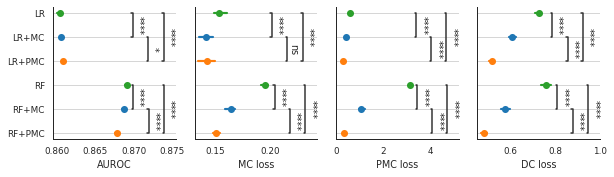

In [71]:
g = make_plot(
    df_results, kind='point', 
    plot_kwargs=dict(
        saturation=0.5,
        ci=99,
        legend_out=True,
        estimator=np.median
    ),
    facet_kwargs=dict(
        aspect=.85,
    )
)


AUROC
.......
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LR vs. LR+MC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:8.959e-06 U_stat=4.288e+05
LR+MC vs. LR+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:2.207e-02 U_stat=4.531e+05
RF vs. RF+MC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.064e-08 U_stat=5.666e+05
RF+MC vs. RF+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:5.085e-18 U_stat=6.027e+05
LR vs. LR+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:6.474e-14 U_stat=3.917e+05
RF vs. RF+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:3.741e-51 U_stat=6.829e+05
........................................
MC loss
.......
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e

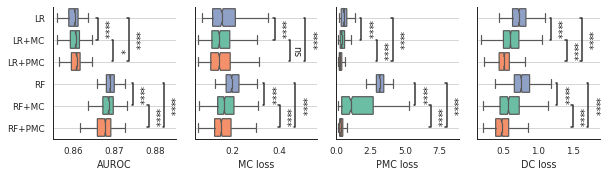

In [72]:
make_plot(
    df_results, kind='box', 
    plot_kwargs=dict(saturation=0.9,
                     palette='Set2'
                    ),
    facet_kwargs=dict(aspect=0.85)
)

AUROC
.......
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LR vs. LR+MC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:8.959e-06 U_stat=4.288e+05
LR+MC vs. LR+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:2.207e-02 U_stat=4.531e+05
RF vs. RF+MC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.064e-08 U_stat=5.666e+05
RF+MC vs. RF+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:5.085e-18 U_stat=6.027e+05
LR vs. LR+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:6.474e-14 U_stat=3.917e+05
RF vs. RF+PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:3.741e-51 U_stat=6.829e+05
........................................
MC loss
.......
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e

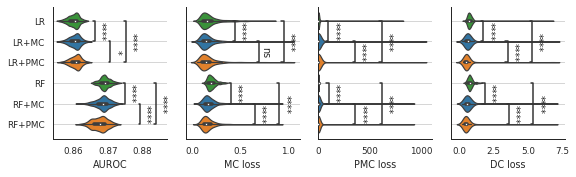

In [73]:
make_plot(df_results, kind='violin')

In [74]:
# pct difference btw RF / LR with and without PMC/MC

df_results
df = df_tbl.groupby('algorithm')[test_metrics].apply(np.mean)

for metric in test_metrics:
    print(metric)
    for m in ['LR','RF']:
#         print('\t',m)
        for post in ['MC','PMC']:
#             print('\t\t',post)
            a = df.loc[m,metric] 
            b = df.loc[f'{m}+{post}',metric]
            pct= 100*((a-b)/a)
            print('\t\t\t',m,post,'% diff:',round(pct,2))
        a = df.loc[f'{m}+MC',metric] 
        b = df.loc[f'{m}+PMC',metric]
        pct= 100*((a-b)/a)
        print('\t\t\t',m,'MC-PMC','% diff:',round(pct,2))
    print('---')

AUROC
			 LR MC % diff: -0.04
			 LR PMC % diff: -0.06
			 LR MC-PMC % diff: -0.02
			 RF MC % diff: 0.07
			 RF PMC % diff: 0.17
			 RF MC-PMC % diff: 0.1
---
MC loss
			 LR MC % diff: 8.21
			 LR PMC % diff: 8.71
			 LR MC-PMC % diff: 0.54
			 RF MC % diff: 11.62
			 RF PMC % diff: 17.25
			 RF MC-PMC % diff: 6.38
---
PMC loss
			 LR MC % diff: -865.73
			 LR PMC % diff: -813.63
			 LR MC-PMC % diff: 5.4
			 RF MC % diff: -222.88
			 RF PMC % diff: -168.55
			 RF MC-PMC % diff: 16.83
---
DC loss
			 LR MC % diff: 1.38
			 LR PMC % diff: 15.92
			 LR MC-PMC % diff: 14.74
			 RF MC % diff: 10.01
			 RF PMC % diff: 22.39
			 RF MC-PMC % diff: 13.76
---


In [75]:
# loss versus running time 

In [76]:
# sns.set_style('white')
# df_plt = df_results.copy()
# df_plt = df_plt.loc[df_results.rho==0.01]
# df_plt = df_plt.loc[df_results.gamma==0.1]
# df_plt = df_plt.loc[df_results.n_bins==10]
# # df_plt = df_plt.loc[df_results.alpha.isin([0.001,0.01,0.1])]
# # df_plt = df_plt.copy().loc[df_results.gamma==0.1]
# df_plt['alpha'] = df_plt['alpha'].astype(str)
# df_plt = df_plt.rename(columns=nice_names) 
# for level,nicety in nice_levels.items():
#     df_plt[level] = df_plt[level].apply(lambda x: nicety[x] if x in nicety else x)
# # row,col,hue=('rho','alpha','gamma') 
# # row,col,hue=('ml_name','gamma','alpha') 
# row,col,hue=('ML','groups','postprocessing') 
# # row,col,hue=('alpha','gamma','postprocessing') 
# # row,col,hue=('gamma','rho','postprocessing') 
# for m in [nice_names[t] if t in nice_names else t for t in test_metrics]:
#     # m = 'Wall Clock Time (s)'
#     print(m)
#     print('----------------------------------------')
#     g=sns.relplot(
#     #         kind='box',
#         kind='scatter',
#         data=df_plt,
#         x='Wall Clock Time (s)',
#         y=m,
#         hue=hue,
#         style='alpha',
#         hue_order=['Base Model','MC','PMC'],
#         row=row,
#         row_order=['LR','RF'],
#         col=col,
# #         facet_kws=dict(sharey=False),
#         aspect=1,
#         height=4
#     )
#     # g.set(grid=True,axis='y')
#     for ax in g.axes.flat:
#         ax.yaxis.grid(True)
#     #         ax.set_ylabel('')